# Persiapan Awal

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as k

from sklearn.metrics import accuracy_score, confusion_matrix

import pickle, sys, os
from typing import Any, List
import warnings
warnings.filterwarnings("ignore")

config_path = os.path.abspath(os.path.join('..'))
if config_path not in sys.path:
    sys.path.append(config_path+"\\src")
from config import * 
from util import *

np.random.seed(SEED)

# Mempersiapkan Data

In [2]:
# me-load data
data = # YOUR CODE HERE

# melihat 5 sample data 
data.sample(5) 

,sepal_length,sepal_width,petal_length,petal_width,class
116,6.5,3.0,5.5,1.8,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa


## Mengecek Data

In [4]:
# cek info data
# YOUR CODE HERE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# cek statistik
# YOUR CODE HERE

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

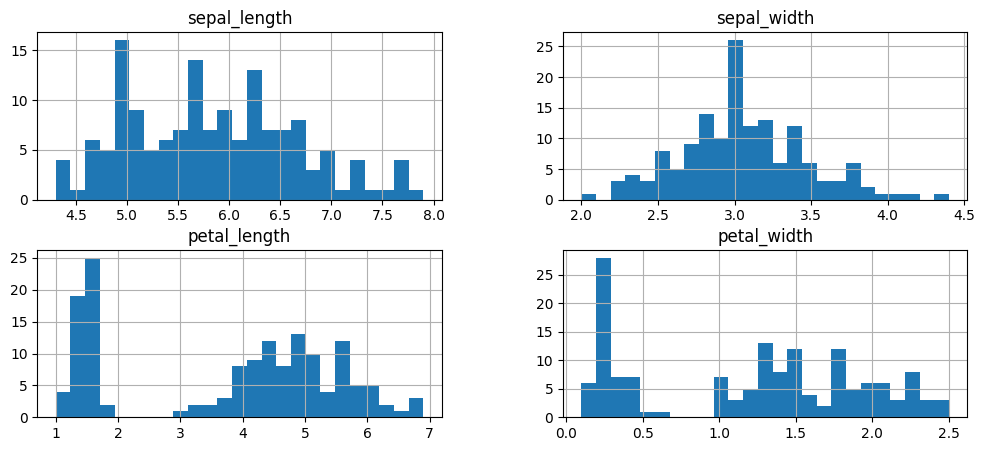

In [6]:
# membuat plot histogram
# YOUR CODE HERE 

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

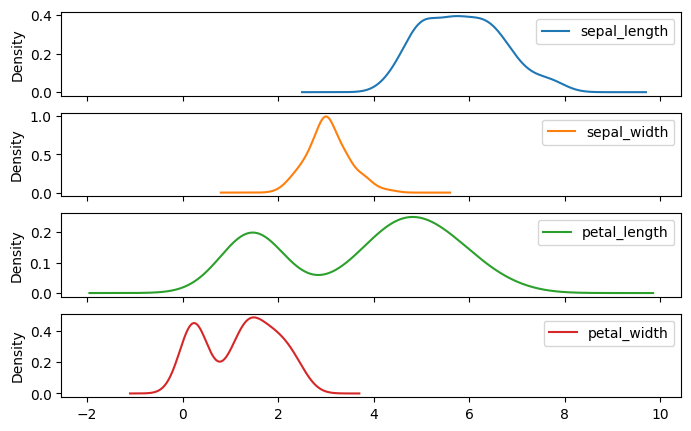

In [7]:
data.plot.kde(figsize=(8,5), subplots=True)

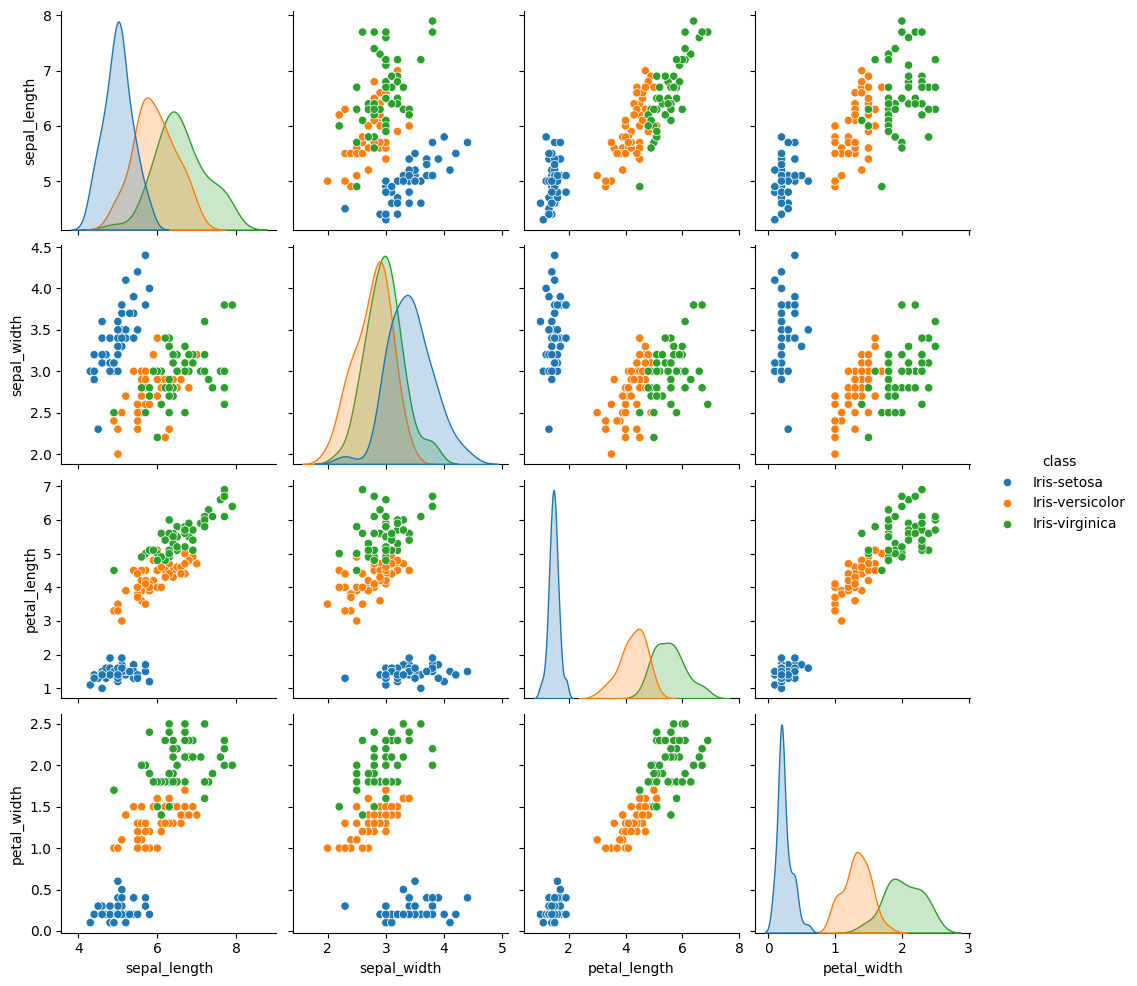

In [8]:
# cek data dari visualisasi
# YOUR CODE HERE 

# Pembagian Data

In [9]:
# Menentukan fitur dan target
X = data[data.columns[:-1]] # fitur 
y = data[data.columns[-1]] # target

# encoding class
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

# Membagi data
X_train, X_test, y_train, y_test = # YOUR CODE HERE 

# Pembuatan Model  

> Skema 1  
![Skema 1](..\img\skema1.jpg)

> Skema 2  
![Skema 2](..\img\skema2.jpg)

## Skema 1 (Model _Decision Tree_)

In [10]:
# list fitur
fitur_numerik = list(X_train.columns)

# pipeline untuk ekstraksi fitur
ekstraksi_fitur = ColumnTransformer([
    ("sepal", FunctionTransformer(ekstrak_sepal,validate=False), ["sepal_length", "sepal_width"]),
    ("petal", FunctionTransformer(ekstrak_petal,validate=False), ["petal_length", "petal_width"]),
])

numerik_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

data_pipeline = Pipeline([
  ('ekstraksi_fitur', ekstraksi_fitur),
  ('scaler', numerik_transformer)
])

In [11]:
# menyambungkan data pipeline ke classifier
dt_clf = Pipeline(
    steps=[("data_pipeline", data_pipeline),
           ("classifier", DecisionTreeClassifier())
          ]
)

# train model
dt_clf.( # YOUR CODE HERE

# prediksi untuk evaluasi
y_dt = # YOUR CODE HERE 

## Skema 1 (Model _SVM_)

In [12]:
# pipeline ke classifier
svm_clf = Pipeline(
    steps=[("data_pipeline", data_pipeline),
           ("classifier", SVC())
          ]
)

# train model
svm_clf.( # YOUR CODE HERE

# prediksi untuk evaluasi
y_svm = # YOUR CODE HERE

## Skema 2 (Model _Neural Network_)

In [13]:
# Settings
max_tokens = 5
epochs = 500
batch_size = 10

train = X_train.copy()
train["label"] = y_train
test = X_test.copy()
test["label"] = y_test

train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

all_inputs = []
encoded_features = []
input_specs = []

for header in fitur_numerik:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)
  input_spec = tf.TensorSpec(shape=(None, 1), dtype=tf.float32, name=f'input_{header}')
  input_specs.append(input_spec)

In [14]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(2, activation="relu")(all_features)
output = tf.keras.layers.Dense(3, activation="softmax")(x)

k.clear_session()
tf.random.set_seed(SEED)
nn_clf = tf.keras.Model(all_inputs, output)
nn_clf.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sepal_length (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 sepal_width (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 petal_length (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 petal_width (InputLayer)    [(None, 1)]                  0         []                            
                                                                                              

In [15]:
# training model

nn_clf.compile(
  optimizer= # YOUR CODE HERE 
  loss=# YOUR CODE HERE
  metrics=# YOUR CODE HERE
)

nn_clf.fit(train_ds, epochs=epochs)

Epoch 1/500


12/12 [==============================] - 1s 3ms/step - loss: 1.0564 - accuracy: 0.5000
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 1.0414 - accuracy: 0.5000
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 1.0269 - accuracy: 0.5083
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 1.0126 - accuracy: 0.5167
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9985 - accuracy: 0.5333
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.9850 - accuracy: 0.5417
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9702 - accuracy: 0.5417
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.9574 - accuracy: 0.5417
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9447 - accuracy: 0.5750
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.9315 - accuracy: 0.5833
Epoch 11/500
12/12 [=

In [16]:
display(nn_clf.evaluate(test_ds))

# prediksi dengan NN
y_nn = [res.argmax() for res in nn_clf.predict(test_ds, verbose=0)]

3/3 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9667


[0.12000055611133575, 0.9666666388511658]

# Evaluasi Model

In [17]:
print(f"Akurasi Model Decision Tree: {accuracy_score(y_test, y_dt)*100:.2f}%")
print(f"Akurasi Model Decision SVM: {accuracy_score(y_test, y_svm)*100:.2f}%")
print(f"Akurasi Model Decision Neural Network: {accuracy_score(y_test, y_nn)*100:.2f}%")

Akurasi Model Decision Tree: 96.67%
Akurasi Model Decision SVM: 96.67%
Akurasi Model Decision Neural Network: 96.67%


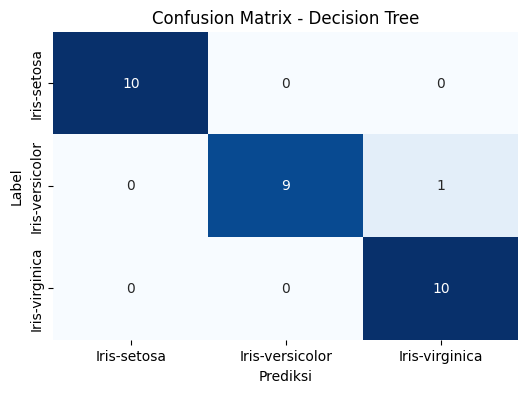

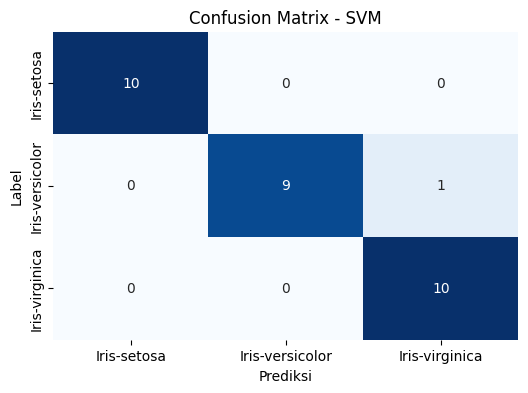

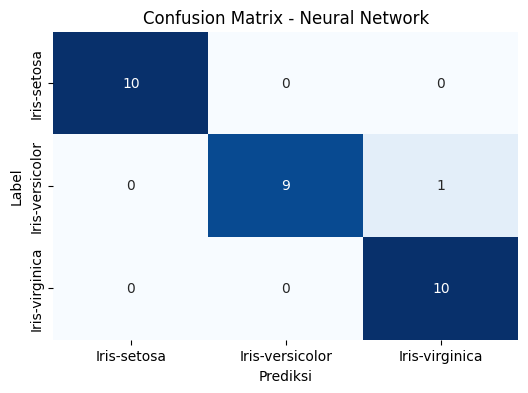

In [18]:
def plot_confusion_matrix(y_true: List[Any], y_pred: List[Any], title: str) -> None:
    """
    Plot matriks kebingungan (confusion matrix).

    Parameters:
    - y_true (List): List yang berisi nilai sebenarnya.
    - y_pred (List): List yang berisi nilai prediksi.
    - title (str): Judul untuk plot.

    Returns:
    - None
    """
    cm = confusion_matrix(y_true, y_pred)
    decoded_labels = le.inverse_transform(range(len(cm)))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                cbar=False, xticklabels=decoded_labels, 
                yticklabels=decoded_labels)
    plt.xlabel('Prediksi')
    plt.ylabel('Label')
    plt.title(title)
    plt.show()

# Display confusion matrix for each model
plot_confusion_matrix(y_test, y_dt, 'Confusion Matrix - Decision Tree')
plot_confusion_matrix(y_test, y_svm, 'Confusion Matrix - SVM')
plot_confusion_matrix(y_test, y_nn, 'Confusion Matrix - Neural Network')

In [19]:
data_pipeline["scaler"]["scaler"].mean_ , data_pipeline["scaler"]["scaler"].var_ 

(array([17.75133333,  5.76783333]), array([12.17991656, 22.27010031]))

# Analisa Model

In [20]:
data_pred = X_test.copy()
data_pred["label"] = y_test 
data_pred["prediksi"] = # YOUR CODE HERE
data_pred["prediksi_benar"] = data_pred.apply(lambda d: 1 if d.label==d.prediksi else 0, axis=1)
data_pred

,sepal_length,sepal_width,petal_length,petal_width,label,prediksi,prediksi_benar
122,7.7,2.8,6.7,2.0,2,2,1
142,5.8,2.7,5.1,1.9,2,2,1
149,5.9,3.0,5.1,1.8,2,2,1
73,6.1,2.8,4.7,1.2,1,1,1
83,6.0,2.7,5.1,1.6,1,2,0
19,5.1,3.8,1.5,0.3,0,0,1
137,6.4,3.1,5.5,1.8,2,2,1
18,5.7,3.8,1.7,0.3,0,0,1
63,6.1,2.9,4.7,1.4,1,1,1
107,7.3,2.9,6.3,1.8,2,2,1


In [21]:
fig = px.parallel_coordinates(data_frame=data_pred,
                              dimensions=['prediksi_benar',
                                          'sepal_width', 
                                          'sepal_length', 
                                          'petal_width', 
                                          'petal_length', 
                                          'label'],
                              color="prediksi", 
                             )
fig.update_layout(font=dict(size=20))

fig.show()

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('ekstraksi_fitur',
                                  ColumnTransformer(transformers=[('sepal',
                                                                   FunctionTransformer(func=<function ekstrak_sepal at 0x0000020F7C0F30D0>),
                                                                   ['sepal_length',
                                                                    'sepal_width']),
                                                                  ('petal',
                                                                   FunctionTransformer(func=<function ekstrak_petal at 0x0000020F7C0F35E0>),
                                                                   ['petal_length',
                                                                    'petal_width'])])),
                                 ('scaler',
                                  Pipeline(steps=[('scaler',
                                                   StandardScaler())]))])),
                ('classifier', DecisionTreeClassifier())])

Text(0.5, 0, '%')

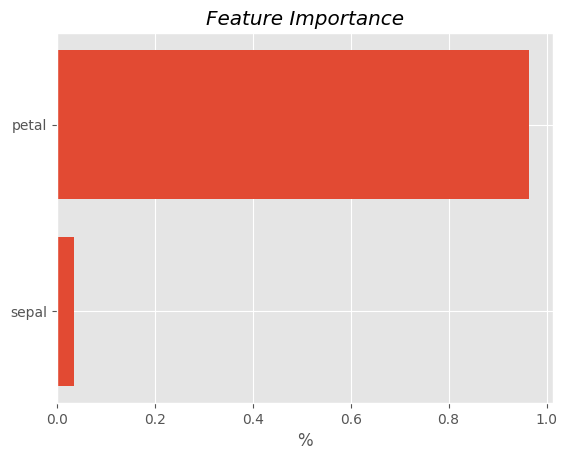

In [22]:
# # Untuk cek isi pipeline
# display(
#   dt_clf["data_pipeline"]["scaler"].get_feature_names_out() ,
#   dt_clf["data_pipeline"]["ekstraksi_fitur"].get_feature_names_out ,
#   dt_clf["classifier"].get_params(),
#   dt_clf["classifier"].n_features_in_ ,
#   dt_clf["classifier"].feature_importances_
# )
display(dt_clf)
plt.style.use("ggplot")
plt.barh(["sepal", "petal"], dt_clf["classifier"].feature_importances_)
plt.title("Feature Importance", fontstyle="italic")
plt.xlabel("%")

# Uji Coba Prediksi

In [23]:
sample = pd.read_csv("../data/simulation_data.csv") # 805, 901, 508
random_sample_data = sample.sample(1)
random_sample_fitur = random_sample_data.drop("class", axis=1)
display(random_sample_data)

sample_prediction_rf = le.inverse_transform(dt_clf.predict(random_sample_fitur))[0]
sample_prediction_svm = # YOUR CODE HERE

input_nn = {name: tf.convert_to_tensor([value]) for name, value in random_sample_fitur.items()}
sample_prediction_nn = le.inverse_transform(np.argmax(nn_clf.predict(input_nn, verbose=0)).reshape(-1))[0]

# menampilkan hasil prediksi
sample_prediction_rf, sample_prediction_svm, sample_prediction_nn, random_sample_data["class"].values[0]

,sepal_length,sepal_width,petal_length,petal_width,class
458,5.5,3.815035,0.4989,1.405123,Iris-setosa


('Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa')

# Simpan Model & Data _Training_

In [24]:
# base directory untuk model
base_dir = '../utilities/'

# menyimpan objek label encoder
with open(f"{base_dir}label_encoder.bin", "wb") as f:
    pickle.dump(le, f, protocol=pickle.HIGHEST_PROTOCOL)

# menyimpan pipeline dengan model decision tree classifier
with open(f"{base_dir}sklearn_dt_pipeline.bin", "wb") as f:
    pickle.dump( # YOUR CODE HERE

# menyimpan tensorflow pipeline
nn_clf.save(f"{base_dir}tf_pipeline.h5")

# menyimpan data train
trained_data = X_train.copy()
trained_data["label"] = y_train
trained_data.to_csv("../data/trained_data.csv", index=False)